In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv(r'../data/game_details.csv')
df.head()

,game_name,highest_price,release_date,genre,publisher,platform,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,playstation_rating_count
0,Grand Theft Auto IV,€24.99,"Feb 15, 2012",Action / Shooter / Racing,Rockstar,PS3,98.0,86.0,8.3,5541.0,4.32,48904.0
1,Red Dead Redemption 2,€59.99,"Oct 26, 2018",Action / Adventure / Unique,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379257.0
2,Red Dead Online,€69.99,"Oct 29, 2018",Action / Adventure,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379346.0
3,Grand Theft Auto 3,€9.99,"Oct 4, 2012",--,Rockstar Games,PS3,97.0,56.0,8.0,2079.0,4.59,1437.0
4,Grand Theft Auto V,€69.99,"Sep 17, 2013",Action / Adventure,Rockstar Games,PS3,97.0,66.0,8.5,14322.0,4.65,40895.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   game_name                     3526 non-null   object 
 1   highest_price                 3415 non-null   object 
 2   release_date                  3526 non-null   object 
 3   genre                         3526 non-null   object 
 4   publisher                     3471 non-null   object 
 5   platform                      3526 non-null   object 
 6   metacritic_score              879 non-null    float64
 7   metacritic_rating_count       879 non-null    float64
 8   metacritic_user_score         880 non-null    float64
 9   metacritic_user_rating_count  880 non-null    float64
 10  playstation_score             3526 non-null   object 
 11  playstation_rating_count      2557 non-null   float64
dtypes: float64(5), object(7)
memory usage: 330.7+ KB


In [66]:
df.shape

(3526, 12)

Após analisar a estrutura do dataframe, listo abaixo alguns ajustes necessários para que as análises entreguem os melhores resultados:

Tratamento das colunas:

1. Na coluna highest_price, tirar o símbolo do euro e transformar em float
2. Transformar a coluna release_date para datetime
3. Na coluna genre, dividir os que tem mais de um genero, tendo uma coluna de genero principal
4. Tranformar a coluna playstation_score para numérica
5. Transformar as colunas metacritic_rating_count e playstation_rating_count para int
Valores Nulos: 
6. Para Análise Exploratória: Você pode preencher com o 0 para indicar que não há avaliações.
7. Para Machine Learning: É mais comum preencher com a média ou mediana da coluna, ou criar uma coluna dummy (boolean) para indicar se o valor estava ausente.
Standartização de texto:
8. Converta todas as strings (genre, publisher, platform) para minúsculas (.str.lower()) e remova espaços em excesso no início e no fim (.str.strip()).

In [67]:
df['highest_price'].unique()

array(['€24.99', '€59.99', '€69.99', '€9.99', nan, '€14.99', '€49.99',
       '€19.99', '€29.99', '€17.99', '€39.99', '€79.99', '€5.99', '€4.99',
       '€7.99', '€12.99', '€54.99', '€8.99', '€13.99', '€1.99', '€18.99',
       '€12.49', '€21.99', '€23.99', '€14.49', '€11.99', '€34.99',
       '€2.99', '€100.00', '€36.99', '€10,000.00', '€74.99', 'FREE',
       '€6.99', '€26.99', '€44.99', '€3.99', '€16.99', '€28.99', '€11.25',
       '€28.49', '€15.99', '€10.99', '€13.29', '€20.99', '€99.99',
       '€5.49', '€32.99', '€38.99', '€7.49', '€64.99', '€2.49', '€6.19',
       '€35.99', '€4.49', '€70.00', '€3.59', '€13.49', '€6.49', '€31.99',
       '€37.99', '€6.59', '€1.49'], dtype=object)

1 - Para ser possível alterar o tipo da coluna 'highest_price' para float, será necessário excluir as linhas com valores como '€10,000.00' (pois impedem a alteração do tipo distorcem as análises gerais) e substituir o 'FREE' por 0.

In [68]:
# Filtra o DataFrame, mantendo apenas as linhas onde o preço é diferente do valor problemático

df = df[df['highest_price'] != '€10,000.00']

# Substitui os valores que estão como 'FREE' por 0

df['highest_price'] = df['highest_price'].replace('FREE', 0)

In [69]:
df['highest_price'].unique()

array(['€24.99', '€59.99', '€69.99', '€9.99', nan, '€14.99', '€49.99',
       '€19.99', '€29.99', '€17.99', '€39.99', '€79.99', '€5.99', '€4.99',
       '€7.99', '€12.99', '€54.99', '€8.99', '€13.99', '€1.99', '€18.99',
       '€12.49', '€21.99', '€23.99', '€14.49', '€11.99', '€34.99',
       '€2.99', '€100.00', '€36.99', '€74.99', 0, '€6.99', '€26.99',
       '€44.99', '€3.99', '€16.99', '€28.99', '€11.25', '€28.49',
       '€15.99', '€10.99', '€13.29', '€20.99', '€99.99', '€5.49',
       '€32.99', '€38.99', '€7.49', '€64.99', '€2.49', '€6.19', '€35.99',
       '€4.49', '€70.00', '€3.59', '€13.49', '€6.49', '€31.99', '€37.99',
       '€6.59', '€1.49'], dtype=object)

In [70]:
# Antes de alterar o tipo da coluna para numérico (float), é necessário retirar o símbolo '€' e também garantir que não haverá espaços antes ou depois dos valores (usando o strip())

df['highest_price'] = (df['highest_price'].str.replace('€','').str.strip().astype(float))

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3515 entries, 0 to 3525
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   game_name                     3515 non-null   object 
 1   highest_price                 3373 non-null   float64
 2   release_date                  3515 non-null   object 
 3   genre                         3515 non-null   object 
 4   publisher                     3460 non-null   object 
 5   platform                      3515 non-null   object 
 6   metacritic_score              877 non-null    float64
 7   metacritic_rating_count       877 non-null    float64
 8   metacritic_user_score         878 non-null    float64
 9   metacritic_user_rating_count  878 non-null    float64
 10  playstation_score             3515 non-null   object 
 11  playstation_rating_count      2546 non-null   float64
dtypes: float64(6), object(6)
memory usage: 357.0+ KB


2. transformar a coluna release_date para datetime

In [72]:
df.head(5)

,game_name,highest_price,release_date,genre,publisher,platform,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,playstation_rating_count
0,Grand Theft Auto IV,24.99,"Feb 15, 2012",Action / Shooter / Racing,Rockstar,PS3,98.0,86.0,8.3,5541.0,4.32,48904.0
1,Red Dead Redemption 2,59.99,"Oct 26, 2018",Action / Adventure / Unique,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379257.0
2,Red Dead Online,69.99,"Oct 29, 2018",Action / Adventure,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379346.0
3,Grand Theft Auto 3,9.99,"Oct 4, 2012",--,Rockstar Games,PS3,97.0,56.0,8.0,2079.0,4.59,1437.0
4,Grand Theft Auto V,69.99,"Sep 17, 2013",Action / Adventure,Rockstar Games,PS3,97.0,66.0,8.5,14322.0,4.65,40895.0


In [73]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3515 entries, 0 to 3525
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   game_name                     3515 non-null   object        
 1   highest_price                 3373 non-null   float64       
 2   release_date                  3515 non-null   datetime64[ns]
 3   genre                         3515 non-null   object        
 4   publisher                     3460 non-null   object        
 5   platform                      3515 non-null   object        
 6   metacritic_score              877 non-null    float64       
 7   metacritic_rating_count       877 non-null    float64       
 8   metacritic_user_score         878 non-null    float64       
 9   metacritic_user_rating_count  878 non-null    float64       
 10  playstation_score             3515 non-null   object        
 11  playstation_rating_count      2546 

3. na coluna genre, dividir os que tem mais de um genero, tendo uma coluna de genero principal

In [75]:
df.head(5)

,game_name,highest_price,release_date,genre,publisher,platform,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,playstation_rating_count
0,Grand Theft Auto IV,24.99,2012-02-15,Action / Shooter / Racing,Rockstar,PS3,98.0,86.0,8.3,5541.0,4.32,48904.0
1,Red Dead Redemption 2,59.99,2018-10-26,Action / Adventure / Unique,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379257.0
2,Red Dead Online,69.99,2018-10-29,Action / Adventure,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379346.0
3,Grand Theft Auto 3,9.99,2012-10-04,--,Rockstar Games,PS3,97.0,56.0,8.0,2079.0,4.59,1437.0
4,Grand Theft Auto V,69.99,2013-09-17,Action / Adventure,Rockstar Games,PS3,97.0,66.0,8.5,14322.0,4.65,40895.0


In [76]:
df['genre'].unique()

array(['Action / Shooter / Racing', 'Action / Adventure / Unique',
       'Action / Adventure', '--', 'Role playing games',
       'Action / Shooter', 'Action', 'Action / Adventure / Horror',
       'Shooter', 'Action / Shooter / Adventure',
       'Role playing games / Adventure', 'Action / Horror',
       'Puzzle / Action / Adventure / Horror', 'Fighting',
       'Action / Arcade / Strategy', 'Simulation', 'Music/rhythm',
       'Action / Role playing games', 'Shooter / Adventure',
       'Strategy / Simulation', 'Action / Shooter / Horror', 'Adventure',
       'Strategy', 'Fighting / Action',
       'Puzzle / Action / Horror / Unique', 'Adventure / Unique',
       'Puzzle / Action / Adventure', 'Arcade', 'Sports', 'Puzzle',
       'Puzzle / Adventure', 'Horror',
       'Role playing games / Adventure / Simulation',
       'Puzzle / Adventure / Unique',
       'Action / Shooter / Music/rhythm / Unique',
       'Action / Role playing games / Adventure',
       'Action / Shooter / Role

Como existem filmes com até cinco gêneros, é obrigatório "splitar" em cinco diferentes colunas nesse primeiro momento, já que a barra '/' está sendo considerada como chave. Na sequencia, iremos apagar 3 das 5 e manter apenas 2 colunas de gêneros, além de cortá-las e renomeá-las.

In [77]:
df[['genero_primario','genero_secundario','genero_terceiro','genero_quarto','genero_quinto']] = df['genre'].str.split('/', expand=True)

In [78]:
df.sample(5)

,game_name,highest_price,release_date,genre,publisher,platform,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,playstation_rating_count,genero_primario,genero_secundario,genero_terceiro,genero_quarto,genero_quinto
793,Metro: Last Light,19.99,2013-05-17,Action / Adventure,Deep Silver,PS3,NaN,NaN,NaN,NaN,4.64,5722.0,Action,Adventure,None,None,None
2755,Strayed Lights,24.99,2023-04-25,Action / Adventure,Embers SAS,PS4,70.0,15.0,6.9,19.0,--,NaN,Action,Adventure,None,None,None
362,Uncharted™: The Nathan Drake Collection,59.99,2015-10-07,Action / Adventure,Sony Interactive Entertainment Europe,PS4,NaN,NaN,NaN,NaN,4.57,24850.0,Action,Adventure,None,None,None
2174,Prince of Persia® Les Sables Oubliés,9.99,2011-11-09,Adventure,UBISOFT ENTERTAINMENT SA,PS3,NaN,NaN,NaN,NaN,4.48,1145.0,Adventure,None,None,None,None
3147,Rock of Ages,7.99,2012-08-01,--,SEGA EUROPE LTD,PS3,NaN,NaN,NaN,NaN,4.12,825.0,--,None,None,None,None


In [79]:
df.drop(columns=['genre','genero_terceiro','genero_quarto','genero_quinto'],inplace=True)

In [80]:
df['genero_primario'] = df['genero_primario'].str.strip()
df['genero_secundario'] = df['genero_secundario'].str.strip()

4. Tranformar a coluna playstation_score para numérica
5. Transformar as colunas metacritic_rating_count e playstation_rating_count para int

In [81]:
df.sample(5)

,game_name,highest_price,release_date,publisher,platform,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,playstation_rating_count,genero_primario,genero_secundario
3216,Isonzo,29.99,2022-09-20,BlackMill Games B.V.,PS5 / PS4,NaN,NaN,NaN,NaN,3.92,1466.0,Action,Shooter
3222,Industria,19.99,2022-06-09,HEADUP GAMES,PS5,NaN,NaN,NaN,NaN,--,NaN,--,None
746,Wandersong,19.99,2019-01-22,Humble Games,PS4,NaN,NaN,NaN,NaN,4.63,38.0,Adventure,None
3018,Dynasty Warriors® 5,9.99,2013-01-30,Koei Tecmo Europe Ltd,PS3,NaN,NaN,NaN,NaN,4.57,101.0,Action,Adventure
357,Joe Danger,7.99,2014-09-03,Hello Games LTD,PS Vita,86.0,48.0,7.2,50.0,3.9,4625.0,Action,None


In [82]:
# usar o pd.to_numeric para tratar valores como '--' que causam erros

df['playstation_score'] = pd.to_numeric(df['playstation_score'], errors='coerce').astype(float)
df['metacritic_rating_count'] = pd.to_numeric(df['metacritic_rating_count'], errors='coerce').astype('Int64')
df['metacritic_user_rating_count'] = pd.to_numeric(df['metacritic_user_rating_count'], errors='coerce').astype('Int64')
df['playstation_rating_count'] = pd.to_numeric(df['playstation_rating_count'], errors='coerce').astype('Int64')

In [83]:
df['metacritic_rating_count'] = df['metacritic_rating_count'].astype('Int64')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3515 entries, 0 to 3525
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   game_name                     3515 non-null   object        
 1   highest_price                 3373 non-null   float64       
 2   release_date                  3515 non-null   datetime64[ns]
 3   publisher                     3460 non-null   object        
 4   platform                      3515 non-null   object        
 5   metacritic_score              877 non-null    float64       
 6   metacritic_rating_count       877 non-null    Int64         
 7   metacritic_user_score         878 non-null    float64       
 8   metacritic_user_rating_count  878 non-null    Int64         
 9   playstation_score             2546 non-null   float64       
 10  playstation_rating_count      2546 non-null   Int64         
 11  genero_primario               3515 

6. Para Análise Exploratória: Você pode preencher com o 0 para indicar que não há avaliações.
7. Para Machine Learning: É mais comum preencher com a média ou mediana da coluna, ou criar uma coluna dummy (boolean) para indicar se o valor estava ausente.

Standartização de texto:

8. Converta todas as strings (genre, publisher, platform) para minúsculas (.str.lower()) e remova espaços em excesso no início e no fim (.str.strip()).

Análises Gráficas

In [85]:
df.sample(5)

,game_name,highest_price,release_date,publisher,platform,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,playstation_rating_count,genero_primario,genero_secundario
3235,Big Rumble Boxing: Creed Champions,34.99,2021-09-03,"SURVIOS, INC",PS4,67.0,8,6.7,6,3.67,103,Fighting,Sports
2444,GreedFall - Standard Edition,34.99,2021-06-30,Focus Entertainment,PS5 / PS4,NaN,<NA>,NaN,<NA>,3.83,12034,Role playing games,None
2561,Amnesia: Memories,29.99,2015-08-26,Idea Factory International Inc.,PS Vita,NaN,<NA>,NaN,<NA>,4.06,759,Role playing games,Unique
2576,Star Trek: Resurgence,39.99,2023-10-27,Bruner House,PS5,71.0,18,6.8,44,NaN,<NA>,--,None
1663,Shadow Warrior 3: Definitive Edition | PS4 & PS5,39.99,2023-02-16,Devolver Digital,PS5 / PS4,NaN,<NA>,NaN,<NA>,NaN,<NA>,Action,None


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3515 entries, 0 to 3525
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   game_name                     3515 non-null   object        
 1   highest_price                 3373 non-null   float64       
 2   release_date                  3515 non-null   datetime64[ns]
 3   publisher                     3460 non-null   object        
 4   platform                      3515 non-null   object        
 5   metacritic_score              877 non-null    float64       
 6   metacritic_rating_count       877 non-null    Int64         
 7   metacritic_user_score         878 non-null    float64       
 8   metacritic_user_rating_count  878 non-null    Int64         
 9   playstation_score             2546 non-null   float64       
 10  playstation_rating_count      2546 non-null   Int64         
 11  genero_primario               3515 

In [89]:
plt.style.use('seaborn-v0_8')

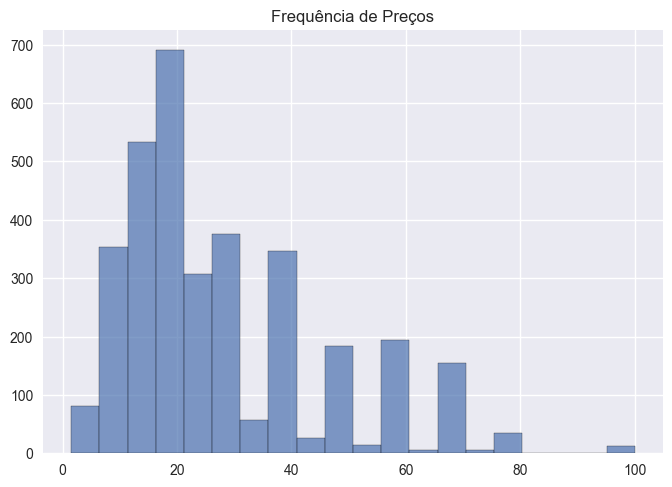

In [90]:
# Histograma

plt.hist(df['highest_price'], bins=20, edgecolor ='black', alpha= 0.7)
plt.title('Frequência de Preços')
plt.show()

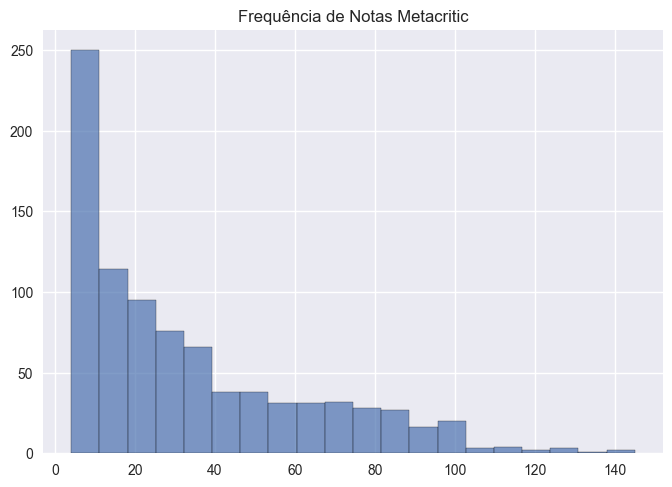

In [91]:
plt.hist(df['metacritic_rating_count'], bins=20, edgecolor ='black', alpha= 0.7)
plt.title('Frequência de Notas Metacritic')
plt.show()

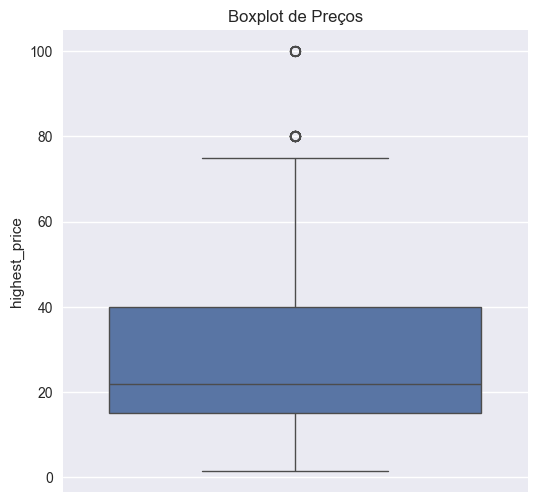

In [92]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,y='highest_price')
plt.title('Boxplot de Preços')
plt.show()

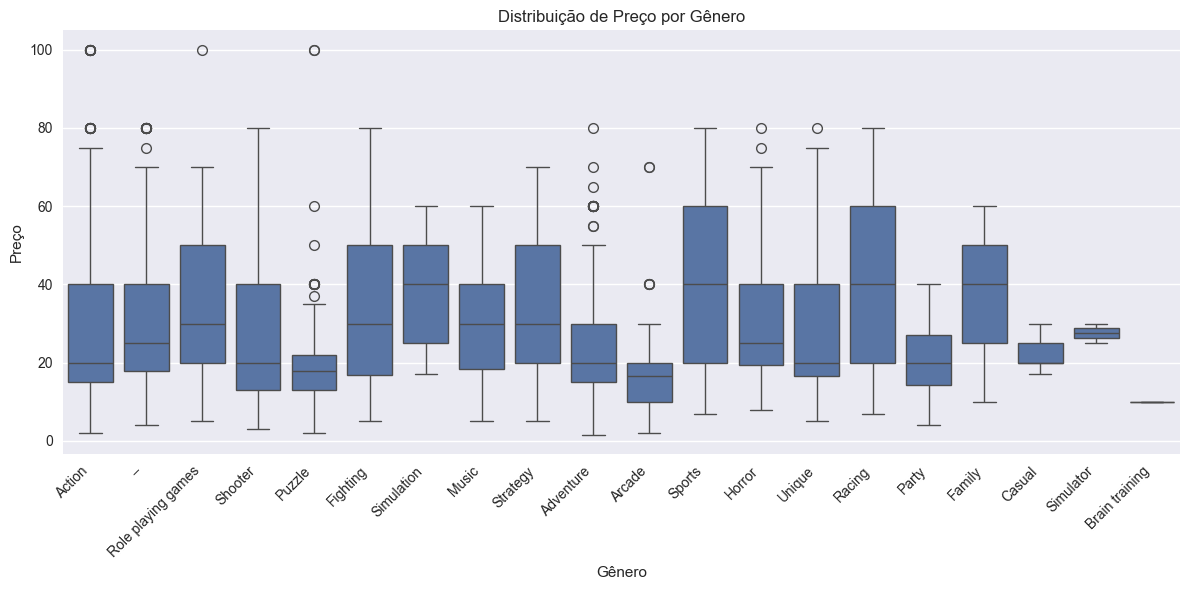

In [93]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='genero_primario', y='highest_price')

plt.title('Distribuição de Preço por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Preço')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

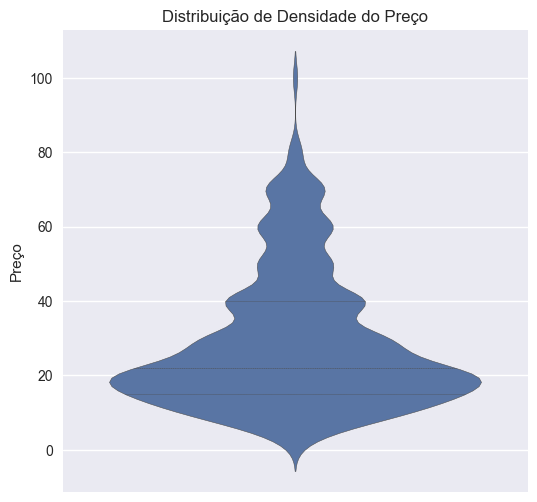

In [101]:
plt.figure(figsize=(6, 6))
sns.violinplot(y=df['highest_price'], inner="quartile")
plt.title('Distribuição de Densidade do Preço')
plt.ylabel('Preço')
plt.show()

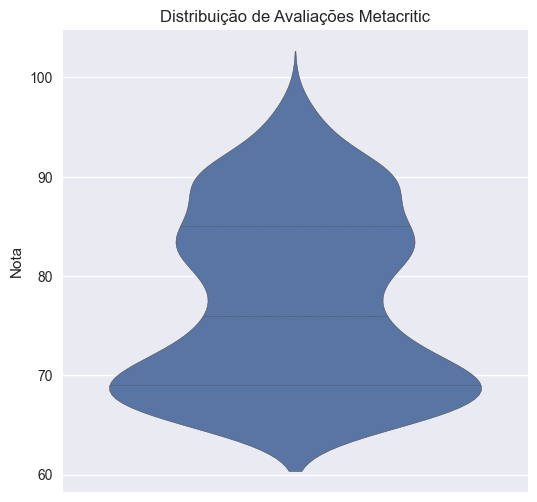

In [104]:
plt.figure(figsize=(6, 6))
sns.violinplot(y=df['metacritic_score'], inner="quartile")
plt.title('Distribuição de Avaliações Metacritic')
plt.ylabel('Nota')
plt.show()

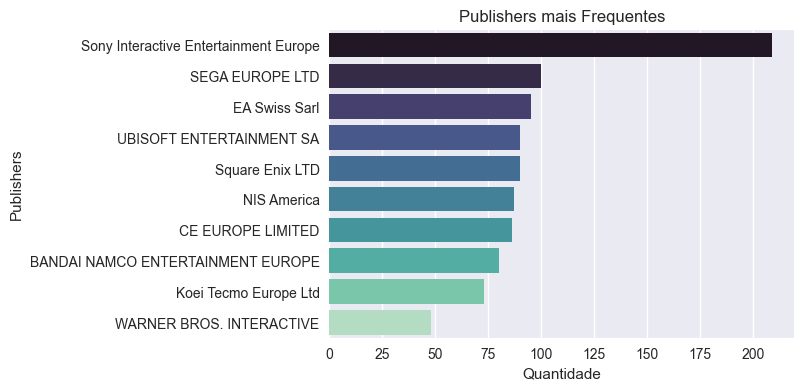

In [ ]:
top_qtde = df['publisher'].value_counts().head(10).reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=top_qtde,x='count',y='publisher',hue='publisher',palette='mako')
plt.title('Publishers mais Frequentes')
plt.xlabel('Quantidade')
plt.ylabel('Publishers')
plt.show()

In [111]:
df.head(5)

,game_name,highest_price,release_date,publisher,platform,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,playstation_rating_count,genero_primario,genero_secundario
0,Grand Theft Auto IV,24.99,2012-02-15,Rockstar,PS3,98.0,86,8.3,5541,4.32,48904,Action,Shooter
1,Red Dead Redemption 2,59.99,2018-10-26,Rockstar Games,PS4,97.0,99,8.9,31932,4.74,379257,Action,Adventure
2,Red Dead Online,69.99,2018-10-29,Rockstar Games,PS4,97.0,99,8.9,31932,4.74,379346,Action,Adventure
3,Grand Theft Auto 3,9.99,2012-10-04,Rockstar Games,PS3,97.0,56,8.0,2079,4.59,1437,--,None
4,Grand Theft Auto V,69.99,2013-09-17,Rockstar Games,PS3,97.0,66,8.5,14322,4.65,40895,Action,Adventure


In [117]:
publishers_score = df.groupby('publisher')['metacritic_score'].mean().sort_values().head(10).reset_index()
publishers_score

,publisher,metacritic_score
0,BILIBILI HK LIMITED,65.0
1,DANGEN ENTERTAINMENT,65.0
2,INVADER STUDIOS S.R.L.,65.0
3,SILESIA GAMES SP. Z O.O.,65.0
4,Fulqrum Publishing Ltd.,65.0
5,Extra Nice B.V.,65.0
6,Secret Mode Limited,65.0
7,Dovetail Games,65.0
8,Path Games,65.0
9,7LEVELS S.A.,65.0
